## Demo Notebook PycQED GUI

This notebook is intended as an introduction to the available graphical tools that can help with using the PycQED library more efficiently.

The GUI currently being developped, if you have any suggestions for improving the user experience please contact me (kknapp@student.ethz.ch).

In [22]:
# run the init script
from pycqedscripts.init.demo.virtual_ATC75_M136_S17HW02_PQSC import *
# set datadir for measurement control and analysis tools
MC.datadir('C:\\Users\\Kuno Knapp\\Documents\\pydata')
a_tools.datadir = MC.datadir()

In [23]:
from pycqed.measurement.calibration.two_qubit_gates import Chevron
qbc = qb2
qbt = qb1
cz_pulse_name = 'CZ_nzbasic'
pl = np.linspace(10e-9, 150e-9, 6)
sweep_points = sp_mod.SweepPoints('pulse_length', pl, 's', dimension=0)
dev.get_pulse_par(cz_pulse_name, qbc, qbt, 'amplitude')(0.6)
amp = 0.5 + np.linspace(-0.4, 0.4, 5)
sweep_points.add_sweep_parameter('amplitude2', amp, 'V', dimension=1)
chevron_task = {
    'qbc': qbc,
    'qbt': qbt,
    'sweep_points': sweep_points
}
task_list = [chevron_task]

# run the Chevron measurement
chevron_experiment = Chevron(task_list,
               dev=dev,
               cal_states=('g', 'e', 'f'), # use calibration states g, e, f
               cz_pulse_name=cz_pulse_name,
               sweep_points=sweep_points,
               label='Chevron',
              )

Deprecate function name: use CircuitBuilder.block_from_pulse_dicts instead.


Starting measurement: Chevron
Sweep function 0: Hard_Sweep
Sweep function 1: SegmentSoftSweep
Detector function: UHFQC_multi_detector
09:38:41	100% completed 	elapsed time: 21.6s 	time left: 0.0s	(until 09:38:41)     


In [24]:
from pycqed.gui.waveform_viewer import WaveformViewer

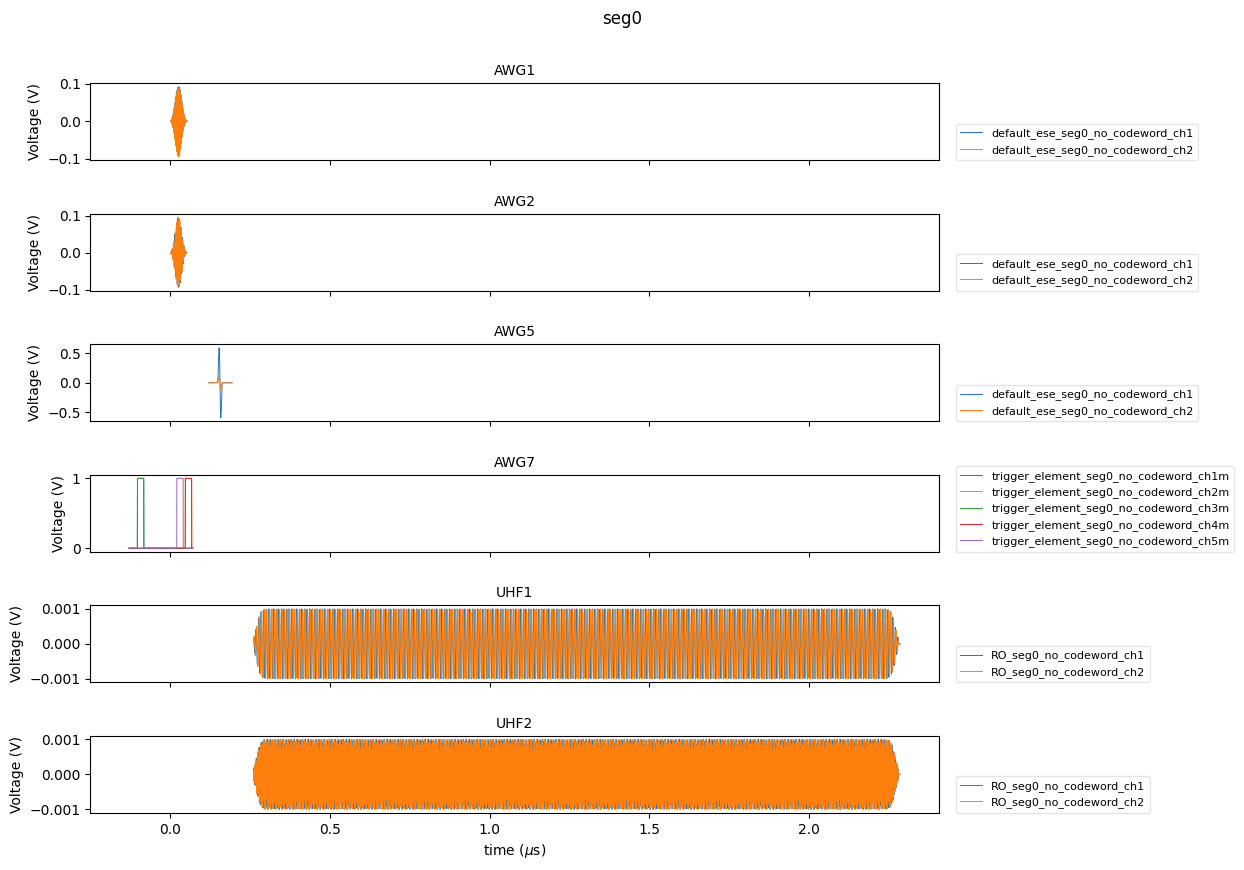

In [29]:
# instantiate the waveform gui, you can pass any object of type QuantumExperiment (or objects that inherit from that class)
wpqe = WaveformViewer(chevron_experiment)